<p>
<img src="https://raw.githubusercontent.com/SantiagoJulioD/Personal/main/logosimbolo-vertical.png" align="left" width="300">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Constantes de movimiento del sistema solar</center></b><h3>
<h5><center><b>Asignada</b>: 15 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 29 de Agosto de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Santiago Julio Dávila
<br/>
<b>Cédula</b>: 1000413445
<br/>
<b>Última actualización</b>: 2023.08.21
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba los resultados vistos en clase sobre las constantes en el problema de los N-cuerpos, en este caso aplicados al sistema solar.  Para ello usaremos el sistema de datos del JPL Horizons y el paquete `astroquery`.

**Procedimiento**:

Para conseguir el objetivo:

1. Obtener las masas, posiciones y velocidades de los planetas del sistema solar (8 planetas) y del Sol durante 20 años (por ejemplo entre 2000 y 2020), cada 3 meses. Use para ello Astroquery y SPICE (para las masas).

2. Para cada punto en el tiempo calcular:

   - El momentum lineal de cada cuerpo.
   - El momentum angular de cada cuerpo.
   - La energía cinética de cada cuerpo.
   - La energía potencial gravidtacional de todo el sistema.

3. Usando el valor de cada una de las cantidades anteriores vamos a calcular el valor de las cuadraturas del sistema:

   - Calcular el momentum lineal total (3 cuadraturas).
   - Calcular el momentum angular total (3 cuadraturas).
   - Calcular la energía total total (1 cuadratura).

   Es muy importante tener en cuenta que el valor de cada una de las cuadraturas puede ser inmenso (las masas del sistema solar son inmensas). Por lo tanto, debemos dividir cada cuadratura por el valor característico de. para ello calcule el valor promedio del momentum lineal, angular y energía cinética del Sol.

4. Hacer gráficos de las 10 cuadraturas.

5. El momentum angular total del sistema solar define el Plano de Laplace del sistema. El momentum angular de cada uno de los cuerpos del sistema solar define la inclinación de la órbita osculatriz del cuerpo respecto al plano de Laplace. Calcular, para cada tiempo, el ángulo entre el plano de Laplace y la órbita osculatriz de cada cuerpo (incluyendo el Sol).

Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

6. Haga un gráfico del ángulo de la órbita osculatriz de cada cuerpo como función del tiempo.

7. Calcule el valor promedio de la inclinación orbital de cada planeta en grados respecto al plano invariante de Laplace.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráfico de las 10 cuadraturas normalizadas (divididas por el valor para el Sol).

  - Gráfico de la inclinación de la órbita osculatriz de cada planeta y el Sol.

- Datos mínimos:
  - Valor de la inclinación orbital de cada planeta

- Gráficos opcionales:
  - Gráfico de las órbitas de los planetas.
  - Gráfico de las magnitudes del momentum lineal y angular total como función del tiempo.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

### Preámbulo

In [2]:
!pip install -q pymcel

In [3]:
from astroquery.jplhorizons import Horizons
from astropy import constants
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spiceypy as spy

In [4]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc -O gm_de440.tpc

--2023-08-20 18:48:17--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: 'gm_de440.tpc'

     0K .......... ..                                         100%  783K=0,02s

2023-08-20 18:48:19 (783 KB/s) - 'gm_de440.tpc' saved [12708/12708]



In [5]:
spy.furnsh('gm_de440.tpc')

In [84]:
G=constants.G.value
AU=constants.au.value

time=86400*np.array(Horizons(id='10',location='@0',epochs=dates).vectors().to_pandas()['datetime_jd'])
time-=time[0]

bods=['Sol','Mercurio','Venus','Tierra','Marte','Júpiter','Saturno','Urano','Neptuno']

Ms=1e9/G*np.array([spy.bodvrd('10','GM',1)[1][0]]+[spy.bodvrd(f'{i}99','GM',1)[1][0] for i in range(1,9)])

dates={'start':'2000-01-01','stop':'2020-01-01','step':'90d'}
Rs=AU*np.array([Horizons(id='10',location='@0',epochs=dates).vectors().to_pandas()[['x','y','z']]]+
            [Horizons(id=f'{i}99',location='@0',epochs=dates).vectors().to_pandas()[['x','y','z']] for i in range(1,9)])

Vs=AU/86400*np.array([Horizons(id='10',location='@0',epochs=dates).vectors().to_pandas()[['vx','vy','vz']]]+
            [Horizons(id=f'{i}99',location='@0',epochs=dates).vectors().to_pandas()[['vx','vy','vz']] for i in range(1,9)])

In [79]:
Ps=np.array([Ms[i]*Vs[i] for i in range(len(Ms))])
Psun=np.mean(np.linalg.norm(Ps[0],axis=1))
Ptot=np.zeros(Ps[0].shape)
for i in range(len(Ps)):
    Ptot+=Ps[i]
    
Pnorm=1/Psun*Ptot

P=np.array([np.linalg.norm(Pnorm[i]) for i in range(len(Pnorm))])

Pmean=np.mean(Pnorm,axis=0)
Pstd=np.std(Pnorm,axis=0)

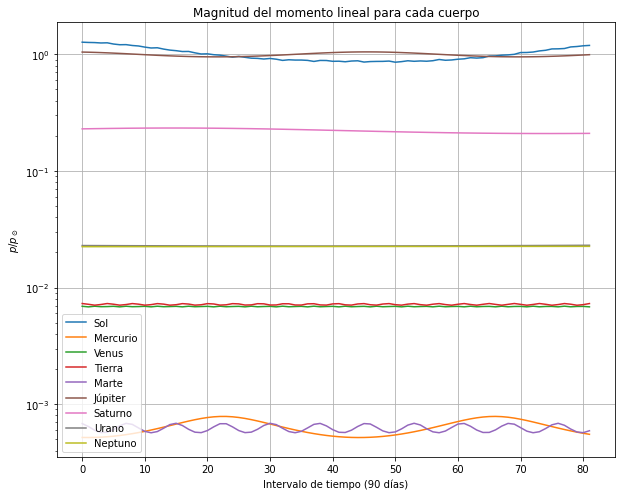

In [111]:
plt.figure(figsize=(10,8))
plt.title('Magnitud del momento lineal para cada cuerpo')
for i in range(9):
    plt.semilogy(np.arange(len(time)),np.linalg.norm(Ps[i],axis=1)/Psun,label=bods[i])
plt.legend()
plt.xlabel('Intervalo de tiempo (90 días)')
plt.ylabel('$p/p_\odot$')
plt.grid()
plt.show()

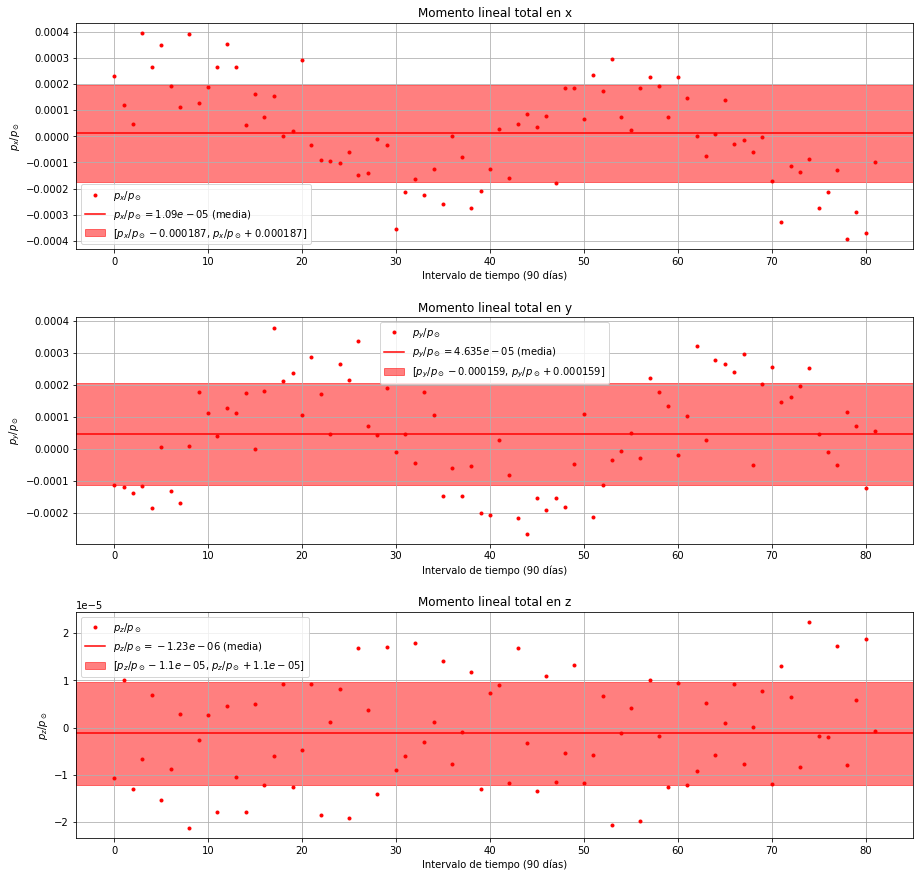

In [105]:
coords=['x','y','z']

plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(np.arange(len(time)),Pnorm[:,i],'r.',label=f'$p_{coords[i]}/p_\odot$')
    plt.axhline(y=Pmean[i],color='r',label=f'$p_{coords[i]}/p_\odot={round(Pmean[i],8)}$ (media)')
    plt.axhspan(Pmean[i]-Pstd[i],Pmean[i]+Pstd[i], alpha=0.5, color='r',
                label=f'[$p_{coords[i]}/p_\odot-{round(Pstd[i],6)}$, $p_{coords[i]}/p_\odot+{round(Pstd[i],6)}]$')
    plt.title(f'Momento lineal total en {coords[i]}')
    plt.xlabel('Intervalo de tiempo (90 días)')
    plt.ylabel(f'$p_{coords[i]}/p_\odot$')
    plt.legend()
    plt.grid()

plt.subplots_adjust(wspace=0.2,
                    hspace=0.3)
plt.show()

In [102]:
Ls=[]
for i in range(len(Ms)):
    Ls.append(np.array([np.cross(Rs[i][j],Ps[i][j]) for j in range(len(Rs[0]))]))
Ls=np.array(Ls)

Lsun=np.mean(np.linalg.norm(Ls[0],axis=1))
Ltot=np.zeros(Ls[0].shape)
for i in range(len(Ls)):
    Ltot+=Ls[i]
    
Lnorm=1/Lsun*Ltot

Lmean=np.mean(Lnorm,axis=0)
Lstd=np.std(Lnorm,axis=0)

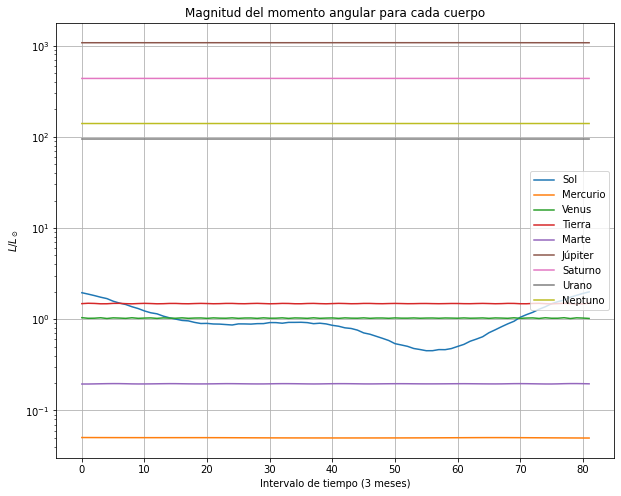

In [109]:
plt.figure(figsize=(10,8))
plt.title('Magnitud del momento angular para cada cuerpo')
for i in range(9):
    plt.semilogy(np.arange(len(time)),np.linalg.norm(Ls[i],axis=1)/Lsun,label=bods[i])
plt.legend(loc='center right')
plt.xlabel('Intervalo de tiempo (3 meses)')
plt.ylabel('$L/L_\odot$')
plt.grid()
plt.show()

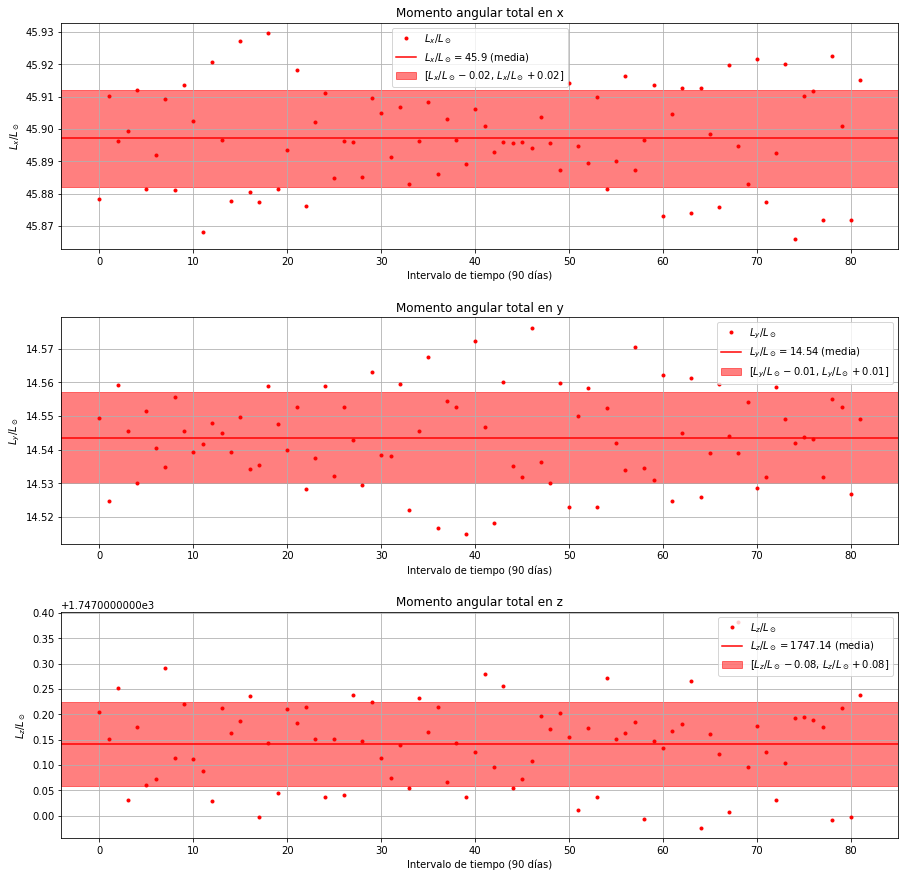

In [107]:
plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(np.arange(len(time)),Lnorm[:,i],'r.',label=f'$L_{coords[i]}/L_\odot$')
    plt.axhline(y=Lmean[i],color='r',label=f'$L_{coords[i]}/L_\odot={round(Lmean[i],2)}$ (media)')
    plt.axhspan(Lmean[i]-Lstd[i],Lmean[i]+Lstd[i], alpha=0.5, color='r',
                label=f'[$L_{coords[i]}/L_\odot-{round(Lstd[i],2)}$, $L_{coords[i]}/L_\odot+{round(Lstd[i],2)}]$')
    plt.title(f'Momento angular total en {coords[i]}')
    plt.xlabel('Intervalo de tiempo (90 días)')
    plt.ylabel(f'$L_{coords[i]}/L_\odot$')
    plt.legend()
    plt.grid()

plt.subplots_adjust(wspace=0.2,
                    hspace=0.3)
plt.show()

In [112]:
V2=np.array([(np.linalg.norm(Vs[i],axis=1))**2 for i in range(len(Vs))])
Ts=np.array([1/2*Ms[i]*V2[i] for i in range(len(V2))])
Tsun=np.mean(Ts[0])

Utot=np.zeros(len(Ts[0]))
for i in range(len(Ms)):
    for j in range(len(Ms)):
        if j==i: 
            continue
        else:
            rij=np.linalg.norm(Rs[i]-Rs[j],axis=1)
            U=-G*Ms[i]*Ms[j]/rij
            Utot+=U
Ttot=np.sum(Ts,axis=0)
Enorm=1/Tsun*(Ttot+Utot)

Emean=np.mean(Enorm)
Estd=np.std(Enorm)

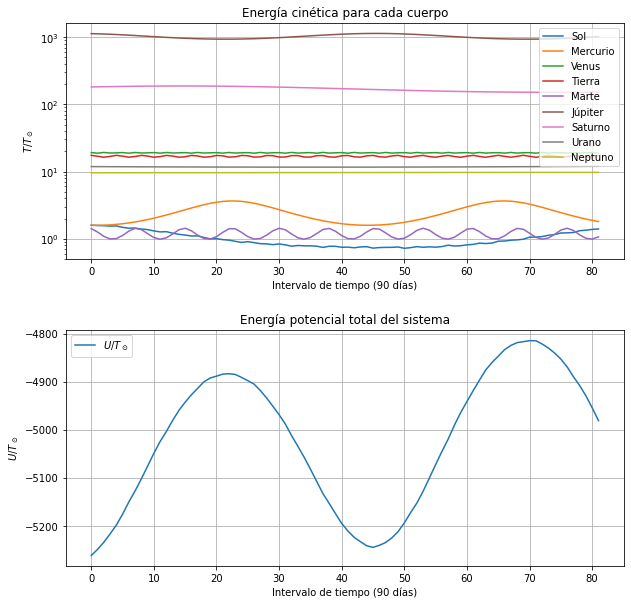

In [120]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Energía cinética para cada cuerpo')
for i in range(9):
    plt.semilogy(np.arange(len(time)),Ts[i]/Tsun,label=bods[i])
plt.xlabel('Intervalo de tiempo (90 días)')
plt.ylabel('$T/T_\odot$')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Energía potencial total del sistema')
plt.plot(np.arange(len(time)),Utot/Tsun,label='$U/T_\odot$')
plt.xlabel('Intervalo de tiempo (90 días)')
plt.ylabel('$U/T_\odot$')
plt.grid()

plt.subplots_adjust(wspace=0.2,
                    hspace=0.3)
plt.legend()
plt.show()

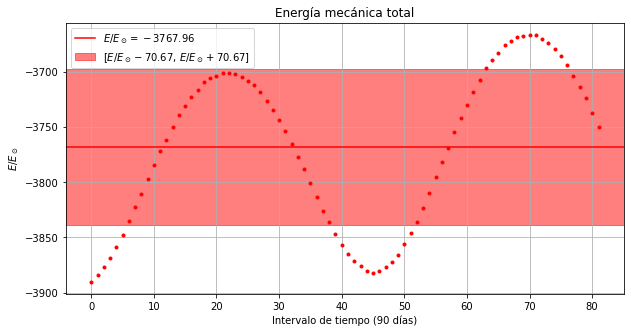

In [118]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(time)),Enorm,'r.')
plt.axhline(y=Emean,color='r',label=f'$E/E_\odot={round(Emean,2)}$')
plt.axhspan(Emean-Estd,Emean+Estd, alpha=0.5, color='r',
            label=f'[$E/E_\odot-{round(Estd,2)}$, $E/E_\odot+{round(Estd,2)}]$')
plt.title(f'Energía mecánica total')
plt.xlabel('Intervalo de tiempo (90 días)')
plt.ylabel(f'$E/E_\odot$')
plt.legend()
plt.grid()
plt.show()

In [10]:
Rcm0=np.zeros(Rs[0].shape)
for i in range(len(Ms)):
    Rcm0+=Ms[i]*Rs[i]
Pt=-1/np.sum(Ms)*np.array([time[i]*Ptot[i] for i in range(len(time))])

Rcm0+=Pt
Rcm0

array([[-6.33853286e+35, -2.43328883e+35,  4.90958728e+34],
       [-5.92208341e+35, -2.70238412e+35,  4.82541555e+34],
       [-5.67017079e+35, -2.96488517e+35,  4.72933257e+34],
       [-5.35041053e+35, -3.39644034e+35,  4.64543100e+34],
       [-4.79561599e+35, -3.74035441e+35,  4.52800466e+34],
       [-4.22591944e+35, -3.82632079e+35,  4.40469479e+34],
       [-3.85939882e+35, -3.86305996e+35,  4.29306138e+34],
       [-3.47666618e+35, -4.04828486e+35,  4.14831132e+34],
       [-2.87410299e+35, -4.18664356e+35,  4.01697492e+34],
       [-2.28104963e+35, -4.03686335e+35,  3.89663754e+34],
       [-1.91560513e+35, -3.83816279e+35,  3.74350002e+34],
       [-1.57646437e+35, -3.79367739e+35,  3.61495961e+34],
       [-1.05641375e+35, -3.71993448e+35,  3.48634106e+34],
       [-5.40276015e+34, -3.38497874e+35,  3.34416143e+34],
       [-2.72119815e+34, -2.98249332e+35,  3.23548074e+34],
       [-8.23680866e+33, -2.76166101e+35,  3.11730161e+34],
       [ 2.87285623e+34, -2.53985871e+35

In [121]:
def angvec(A,B):
    cos=A@B/(np.linalg.norm(A)*np.linalg.norm(B))
    θ=np.rad2deg(np.arccos(cos))
    return θ

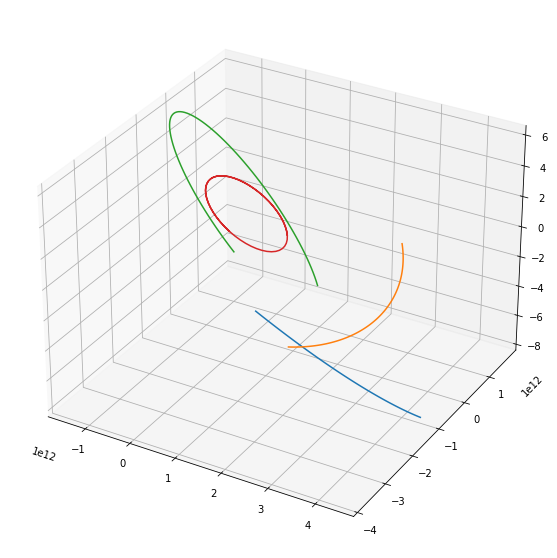

In [11]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.plot(Rs[8,:,0],Rs[8,:,1],Rs[8,:,2])
ax.plot(Rs[7,:,0],Rs[7,:,1],Rs[7,:,2])
ax.plot(Rs[6,:,0],Rs[6,:,1],Rs[6,:,2])
ax.plot(Rs[5,:,0],Rs[5,:,1],Rs[5,:,2])
plt.show()

8

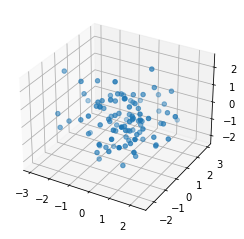

In [12]:
def plot_3d():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.random.standard_normal(100)
    y = np.random.standard_normal(100)
    z = np.random.standard_normal(100)
    ax.scatter(x, y, z)
    return ax

from mpl_toolkits.mplot3d import Axes3D

ax = plot_3d()
def on_move(event):
    if event.inaxes == ax:
        ax.view_init(elev=event.ydata, azim=event.xdata)
        plt.draw()

fig = ax.get_figure()
fig.canvas.mpl_connect('motion_notify_event', on_move)


In [138]:
θs=[]
for i in range(len(Ms)):
    θs.append(np.array([angvec(Ls[i][j],Ltot[j]) for j in range(len(Ltot))]))
θs=np.array(θs)

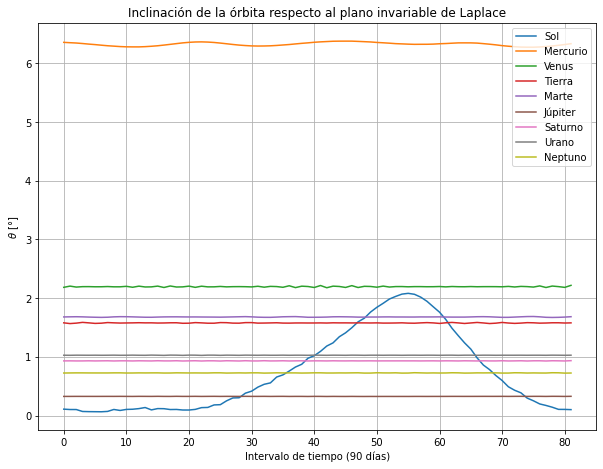

In [150]:
plt.figure(figsize=(10,7.5))
plt.title('Inclinación de la órbita respecto al plano invariable de Laplace')
for i in range(9):
    plt.plot(np.arange(len(time)),θs[i],label=bods[i])
plt.xlabel('Intervalo de tiempo (90 días)')
plt.ylabel('$θ$ [°]')
plt.legend()
plt.grid()

In [149]:
θm=np.array([[np.mean(θs[i]),np.std(θs[i])] for i in range(len(θs))])
Θ=pd.DataFrame({'Cuerpo':bods,'θ [°]':θm[:,0],'σ_θ [°]':θm[:,1]})
Θ

,Cuerpo,θ [°],σ_θ [°]
0,Sol,0.727113,0.679202
1,Mercurio,6.327178,0.029393
2,Venus,2.195865,0.008132
3,Tierra,1.577970,0.004138
4,Marte,1.679578,0.003560
5,Júpiter,0.326756,0.000662
6,Saturno,0.931948,0.001328
7,Urano,1.028137,0.001009
8,Neptuno,0.726459,0.001633
